# Experimentos Estatísticos e Testes de Significância

## 1. Teste A/B

O Teste A/B é um experimento com dois grupos para determinar qual dos dois tratamentos (procuto, procedimento, etc.) é o melhor.

O código abaixo define um conjunto de dados simples representando o resultado de um experimento para testas o efeito de dois preços diferentes nas vendas de um produto.

In [1]:
import numpy as np
import pandas as pd

ecommerce = pd.DataFrame([['Price A', 200, 23539], ['Price B', 182, 22406]], 
                         columns=['Price', 'Conversion', 'Noconversion'])
ecommerce

,Price,Conversion,Noconversion
0,Price A,200,23539
1,Price B,182,22406


## 2. Testes de Hipóteses

Os testes de hipóteses, também chamados de _testes de significância_, são onipresentes na análise estatística tradicional. Seu objetivo é ajudá-lo a saber se o acaso aleatório pode ser responsável por um efeito observado.

Em um teste A/B adequadamente projetado, você coleta dados sobre os tratamentos A e B de tal forma que qualquer diferença observada entre A e B deve ser devida a:
- Acaso aleatório na atribuição de sujeitos
- Uma verdadeira diferença entre A e B

### 2.1. Hipótese Nula

Existe envolve uma suposição básica de que os tratamentos são equivalentes e qualquer diferença entre os grupos é devida ao acaso. Esta suposição de base é denominada **hipótese nula**. Nossa esperança é, então, que possamos, de fato, provar que a hipótese nula está errada e mostrar que os resultados para os grupos A e B são mais diferentes do que o acaso poderia produzir.

### 2.2. Hipótese Alternativa

Os testes de hipóteses, por sua natureza, envolvem não apenas uma hipótese nula, mas também uma **hipótese alternativa**. Em conjunto, as hipóteses nula e alternativa devem considerar todas as possibilidades. A natureza da hipótese nula determina a estrutura do teste de hipóteses.


## 3. Reamostragem

_Reamostragem_ em estatística significa coletar repetidamente valores de dados observados, com um objetivo geral de avaliar a variabilidade aleatória em uma estatística.

Existem dois tipos principais de procedimentos de reamostragem: **bootstrap** e os **testes de permutação**. O _bootstrap_ é usado para avaliar a confiabilidade de uma estimativa. _Testes de permutação_ são usados para testar hipóteses, tipicamente envolvendo dois ou mais grupos.

### 3.1 Testes de Permutação

Em um procedimento de permutação, duas ou mais amostras estão envolvidas, tipicamente os grupos em um teste de hipótese. Permutar significa alterar a ordem de um conjunto de valores. O primeiro passo em um teste de permutação de uma hipótese é combinar os resultados dos grupos A e B (e, se usados, C, D, ...) juntos. Esta é a incorporação lógica da hipótese nula de que os tratamentos aos quais os grupos foram expostos não altera o efeito. Em seguida, testamos essa hipótese desenhando aleatoriamente grupos desse conjunto combinado e vendo o quanto eles diferem um do outro. O procedimento de permutação é o seguinte:

1. Combine os resultados dos diferentes grupos em um único conjunto de dados.
2. Embaralhe os dados combinados e, em seguida, retire aleatoriamente uma amostra do mesmo tamanho que o grupo A.
3. A partir dos dados restantes, retire aleatoriamente uma amostra do mesmo tamanho que o grupo B.
4. Faça o mesmo para os grupos C, D e assim por diante.
5. Seja qual for a estatística ou estimativa calculada para as amostras originais, calcule-as agora para as novas amostras e registre; isso constitui uma iteração de permutação.
6. Repita as etapas anteriores $R$ vezes para obter uma distribuição de permutação da estatística de teste.

O código em Python abaixo implementa esse algoritmo para dois grupo (A e B) e utilizando a estatística de média.


In [2]:
def permutation_test_mean(pooled, n1, n2):
    np.random.shuffle(pooled)
    x = pooled[:n1]
    y = pooled[-n2:]
    return x.mean() - y.mean()

**Exemplo 1.** Como exemplo de uso da função `permutation_test_mean`, apresentamos dois conjuntos de dados abaixo ($a$ e $b$) que representam os tempos médios de sobrevida (em meses) para um tratamento (grupo A) e um grupo de controle (grupo B).

In [3]:
a = np.array([94,197,16,38,99,141,23])
b = np.array([52,104,146,10,51,30,40,27,46])
delta = a.mean() - b.mean()
print(delta)

30.63492063492064


Como vemos, o grupo A tem uma sobrevida média superior em 30 meses ao grupo A. A questão agora é determinar o quão provável é que esta deferença se deva apenas ao acaso na distribuição dos indivíduos nos grupos. Para isso usaremos o teste de permutação.

In [4]:
num_samples = 10000
pooled = np.hstack([a,b])
estimates = np.array(list(map(lambda x: permutation_test_mean(pooled, a.size, b.size), range(num_samples))))
less_extremes = np.where(estimates <= delta)[0]
p = 1.0 - float(len(less_extremes))/float(num_samples)
print(p)

0.13780000000000003


O que significa que existe uma change de aproximadamente 14% de que o mero acaso possa gerar diferenças de média tão grandes quanto os que foram medidos pelo experimento. Considerando um valor de _alfa_ de 5%, nós falhamos em rejeitar a Hipótese Nula ($H_0$).

A título de vizualização, apresentamos a seguir o histograma das estimativas geradas pelo teste de permutação.


Text(0.5, 1.0, 'Teste de Permutação')

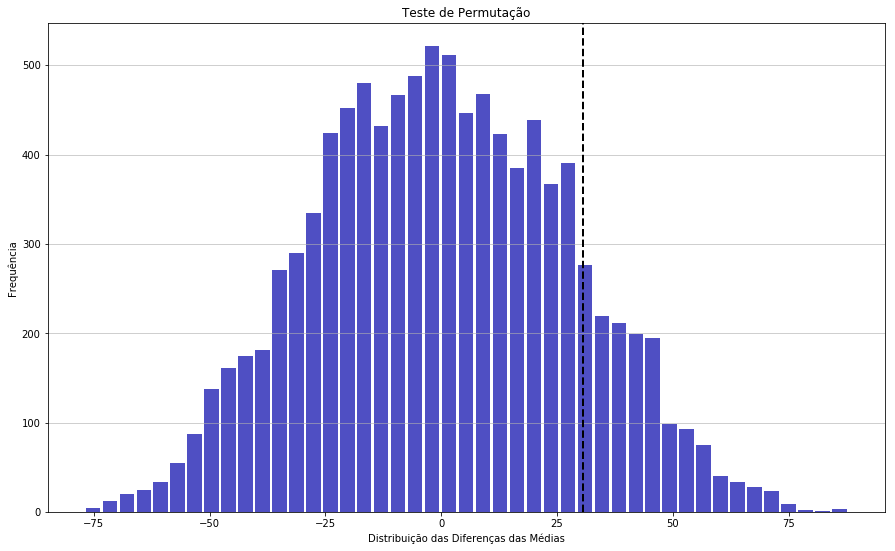

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# An "interface" to matplotlib.axes.Axes.hist() method
fig, ax = plt.subplots(figsize=(15,9))
n, bins, patches = ax.hist(x=estimates, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
ax.axvline(delta, color='k', linestyle='dashed', linewidth=2)
ax.grid(axis='y', alpha=0.75)
ax.set_xlabel('Distribuição das Diferenças das Médias')
ax.set_ylabel('Frequência')
ax.set_title('Teste de Permutação')

Isso conclui o exemplo. $\Diamond$

**Exercício 1.** Utilize testes de permutação para determinar se a diferença entre as taxas de converção para os Preços A e B do dataframe `ecommerce` (definido acima) são estatisticamente significativas ou não. Considere _alfa_ igual a 5%. Para fazer os testes de permutação crie vetores contendo zeros e uns para representar as observações (zeros para não-coversão e uns para conversão) utilizando as funções `np.zeros` e `np.ones` do NumPy.

Neste exercício, estamos interessados na quantidade de conversões (compras) e não nas médias. Por isso a função `permutation_test_mean` não irá funcionar. Utilize a função `permutation_test_sum` definida abaixo.

In [6]:
def permutation_test_sum(pooled, n1, n2):
    np.random.shuffle(pooled)
    x = pooled[:n1]
    y = pooled[-n2:]
    return x.sum() - y.sum()

Caso seja necessário, insira mais células no notebook.

In [7]:
# Código para análise dos dados
import numpy as np

int_samples = 20000

a_zeros = np.zeros([23539])#int(ecommerce['Noconversion'][0])]) # 23539
a_ones = np.ones([200])#int(ecommerce['Conversion'][0])]) # 200
b_zeros = np.zeros([22406])#int(ecommerce['Noconversion'][1])]) # 22406
b_ones = np.ones([182])#int(ecommerce['Conversion'][1])]) # 182

size_a = a_zeros.size + a_ones.size
size_b = b_zeros.size + b_ones.size

# average conversion
delta = (((a_ones.sum()*100)/size_a) - (((b_ones.sum()*100)/size_b)))

pooled_conv = np.hstack([a_ones, b_ones])
pooled_noconv = np.hstack([a_zeros, b_zeros])
pooled_all = np.hstack([pooled_conv, pooled_noconv])

estimates = np.array(list(map(lambda x: permutation_test_sum(pooled_all, size_a, size_b), range(int_samples))))
less_extremes = np.where(estimates <= delta)[0]
p = 1.0 - float(len(less_extremes))/float(num_samples)

print(p)

0.3378


_Comente os resultados Obtidos_

Uma vez que p=0.33, existe uma chance aproximada de 33% de que a aleatoriedade gere uma conversão de compra.
A hipótese nula, portanto, não pode ser descartada considerando-se um valor alfa de 5%.

$\Diamond$ **_Fim do Exercício 1_** $\Diamond$

**Exercício 2.** Baixe o conjunto de dados chamado `web_page_data.csv` da página da disciplina no Moodle e carregue estes dados para um DataFrame em Python. Este DataFrame contém dois campos, _Page_ e _Time_. Utilize os conceitos vistos até aqui para determinar se a diferença de tempo de permanência entre os usuário que acessam a 'Page A' e os usuários que acessam a 'Page B' é estatisticamente significativa ou não. Considere o valor de _alfa_ igual a 5%. (Se precisar, insira mais células no notebook.)

In [10]:
# Código para a análise dos dados
int_samples = 1000

df = pd.read_csv('web_page_data.csv')

page_a = df[df['Page'] == 'Page A']
page_b = df[df['Page'] == 'Page B']

a_sum = page_a.sum()['Time']
a_count = page_a.count()['Time']
a_time = page_a['Time']

b_sum = page_b.sum()['Time']
b_count = page_b.count()['Time']
b_time = page_b['Time']

# average conversion (buy) time
delta = abs((a_sum / a_count) - (b_sum / b_count))

pooled = np.hstack([a_time, b_time])

estimates = np.array(list(map(lambda x: permutation_test_sum(pooled,
                                                             len(a_time),
                                                             len(b_time)),
                                                             range(int_samples))))

less_extremes = np.where(estimates <= delta)[0]

p = 1.0 - float(len(less_extremes))/float(int_samples)

print(p)

0.925


_Comente os resultados obtidos_

Uma vez que p=0.92, existe uma chance aproximada de 92% de que a aleatoriedade se relacione à permanência de tempo na paǵina.
A hipótese nula, portanto, não pode ser descartada considerando-se um valor alfa de 5%.

$\Diamond$ **_Fim do Exercício 2_** $\Diamond$

## 4. Análise de Variância (ANOVA)

Suponha que, em vez de um teste A/B, tivéssemos uma comparação de vários grupos, digamos A-B-C-D, cada um com dados numéricos. O procedimento estatístico que testa uma diferença estatisticamente significativa entre os grupos é chamado de análise de variância, ou ANOVA.

Em vez de nos preocuparmos com todas as diferentes comparações possíveis entre pares de páginas individuais, podemos fazer um único teste geral que aborda a questão: _“É possível que todos os diferentes tratamentos (A-B-C-D) tenham o mesmo efeito, e a diferença entre eles se deva ao acaso?”_ O procedimento usado para testar esta hipótese é o ANOVA. A base para o ANOVA pode ser vista no seguinte procedimento de reamostragem:
1. Combine todos os dados juntos em uma única caixa
2. Embaralhe e extraia $K$ novas amostras, repectivamente com $[n_1, n_2, \ldots, n_k]$ observações cada
3. Registre a média de cada um dos $K$ grupos
4. Registre a variância entre as $K$ médias do grupo
5. Repita os passos 2 a 4 muitas vezes (umas 1.000 ou mais)
Que proporção das vezes a variância reamostrada excedeu a variância observada? Esse é o valor $p$.

Existem duas funções no pacote SciPy que implementa o cálculo do ANOVA. Ambas definidas dentro do sub-pacote `scipy.stats`. A função `f_oneway` e a função `kruskal`. 

A função `f_oneway` dá resultados mais confiáveis, mas ela pré-supõe alguns requisitos:
1. As amostras são independentes.
2. Cada amostra é de uma população normalmente distribuída.
3. Os desvios padrão da população dos grupos são todos iguais. Esta propriedade é conhecida como homocedasticidade.

A função `kruskal` não exige estes pré-requisitos, mas tem menor poder e menor precisão no cálculo do valor $p$.


**Exemplo 2.** Temos um conjunto de dados referente a um experimento para determinar se a dose de um certo remédio tem influência na libido dos pacientes. (O conjunto de dados `difficile.csv` está disponível na página do Moodle.) Este conjunto de dados possui três atrubutos: `person` (identificador numérico do paciente), `dose` (1=placebo, 2=baixa, ou 3=alta), e `libido` (indicador numérico de nível).

Vamos dar uma olhada no conjunto de dados:


In [11]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("difficile.csv")
df.drop('person', axis= 1, inplace= True)

df.describe()

,dose,libido
count,15.000000,15.000000
mean,2.000000,3.466667
std,0.845154,1.767430
min,1.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.500000
max,3.000000,7.000000


Agora vejamos, aproximadamente como o atributo libido está distribuído de acordo com as doses.

In [12]:
df['libido'].groupby(df['dose']).describe()

,count,mean,std,min,25%,50%,75%,max
dose,,,,,,,,
1,5.0,2.2,1.303840,1.0,1.0,2.0,3.0,4.0
2,5.0,3.2,1.303840,2.0,2.0,3.0,4.0,5.0
3,5.0,5.0,1.581139,3.0,4.0,5.0,6.0,7.0


É possível ver que o grupo que recebeu dose 1 (placebo) tem a menor média, o grupo que recebeu dose 2 (baixa) tem media superior ao placebo, e o grupo que recebeu dose 3 (alta) tem a maior média. A questão agora é determinar se essa diferença é *estatisticamente significante* ou se pode ser explicada apenas pelo acaso. Ou seja, temos que determinar se podemos recusar a Hipótese Nula ($H_0$) de que o tratamento não é resposável pelo efeito verificado.

Para isso, como temos mais de dois grupos, vamos utilizar o teste ANOVA. Se for possível desejamos utilizar a função `f_oneway` que dá resultados com maior poder. Portanto, precisamos verificar se os pré-requisitos são satisfeitos.

_Pré-requisito 1._ As amostra são independentes.

Uma vez que as amostras foram realizadas para pacientes diferentes e não envolveram nenhum tipo de medida repetida, elas são independentes.

_Pré-requisito 2._ Cada amostra é de uma população normalmente distribuída.

Este pré-requisito pode ser verificado pelo [Teste de Shapiro-Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) que é implementado pela função `shapiro` do pacote `scipy.stats`. Esta função retorna dois valores, o primeiro é a _Estatística F_ da amostra, e o segundo é o valor $p$ da hipótese de que a amostra seja normalmente distribuída. Assim, se o segundo valor retornado pela função `shapiro` for superior ao valor de _alfa_ isso indica que a amostra deve ser, de fato, normalmente distribuída.

Abaixo calcularemos a função `shapiro` para as três doses.

In [13]:
from scipy.stats import shapiro

shapiro(df['libido'][df['dose'] == 1])

(0.902019739151001, 0.421149343252182)

In [14]:
shapiro(df['libido'][df['dose'] == 2])

(0.902019739151001, 0.421149343252182)

In [15]:
shapiro(df['libido'][df['dose'] == 3])

(0.9867621660232544, 0.9671739339828491)

Como podemos ver, nos três casos, a amostra é normalmente distribuída. Embora não seja necessário, vamos plotar os gráficos QQ-plot das três amostras para nos familiarizarmos mais com os dados.

Text(0.5, 1.0, 'Q-Q Plot para Placebo')

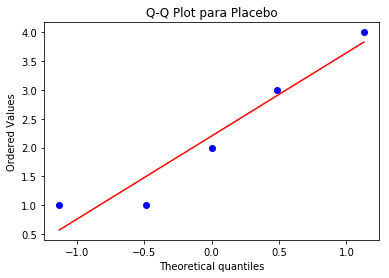

In [16]:
from scipy import stats

stats.probplot(df['libido'][df['dose'] == 1], plot=plt)
plt.title("Q-Q Plot para Placebo")

Text(0.5, 1.0, 'Q-Q Plot para Dose Baixa')

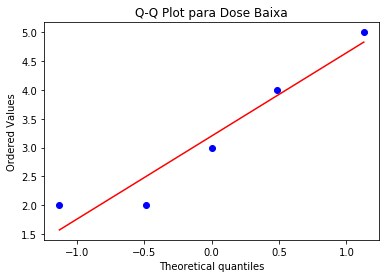

In [17]:
stats.probplot(df['libido'][df['dose'] == 2], plot=plt)
plt.title("Q-Q Plot para Dose Baixa")

Text(0.5, 1.0, 'Q-Q Plot para Dose Alta')

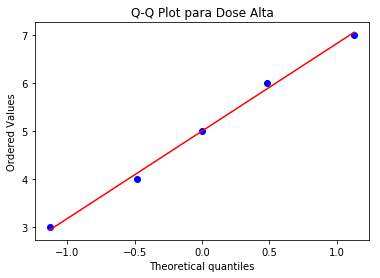

In [18]:
stats.probplot(df['libido'][df['dose'] == 3], plot=plt)
plt.title("Q-Q Plot para Dose Alta")

Pelos gráficos, podemos ver que a amostra para dose alta está, realmente, muito mais conformada à distribuição normal do que as amostras para placebo e para dose baixa. Como já indicavam os valores calculados pela função `shapiro`.

_Pré-requisito 3._ Homogeneidade de Variância

É possível verificar se as variâncias de diversas amostras é (aproximadamente) a mesma utilizando-se a o [Teste de Levene](https://en.wikipedia.org/wiki/Levene%27s_test) que é implementado pela função `stats.levene` na biblioteca SciPy. O Teste de Levene testa a hipótese nula de que todas as amostras de entrada são de populações com variâncias iguais. A função retorna dois valores: a estatística de teste, e o valor $p$ da hipótese nula.

Assim, podemos verificar a homogeneidade de variância da seguinte forma:


In [19]:
stats.levene(df['libido'][df['dose'] == 1], 
             df['libido'][df['dose'] == 2],
             df['libido'][df['dose'] == 3])

LeveneResult(statistic=0.11764705882352934, pvalue=0.8900225182757423)

Podemos ver que o valor $p$ retornado é bem acima de $\alpha = 0.05$. Portanto não é possível rejeitar a hipótese nula. Ou seja, as distribuição possuem de fato homogeneidade nas variâncias.

Agora que verificamos **todos os três** pré-requisitos, podemos conduzir o Teste ANOVA propriamente dito.


In [20]:
stats.f_oneway(df['libido'][df['dose'] == 1], 
               df['libido'][df['dose'] == 2],
               df['libido'][df['dose'] == 3])

F_onewayResult(statistic=5.11864406779661, pvalue=0.024694289538222603)

Temo a Estatística $F = 5.119$ e o valor $p = 0.025$, o que indica que podemos rejeitar a Hipótese Nula ($H_0$), e portanto **existe de fato um efeito significativo** da dosagem do medicamento na libido. 

Porém não sabemos ainda onde este efeito ocorre (como a dosagem influencia no efeito). Para determinar qual o efeito de cada grupo deveríamos conduzir uma análise chamada _Testes Post-hoc_, que não vimos ainda.

$\Diamond$ **_Fim do Exemplo 2_** $\Diamond$

**Exercício 3.** Baixe o arquivo `four_sessions.csv` da página do Moodle, e determine se a o _layout_ da página web, é ou não estatísticamente significante para o tempo de permanência na página. Proceda conforme o exemplo acima. Adicione ao notebook quantas células julgar necessárias.

In [21]:
# Análise de significância
from scipy import stats
from scipy.stats import shapiro

df = pd.read_csv("four_sessions.csv")

# teste de homocedasticidade (homogeneity test)
shapiro1 = shapiro(df['Time'][df['Page'] == 'Page 1'])
shapiro2 = shapiro(df['Time'][df['Page'] == 'Page 2'])
shapiro3 = shapiro(df['Time'][df['Page'] == 'Page 3'])
shapiro4 = shapiro(df['Time'][df['Page'] == 'Page 4'])

# teste do valor de alfa (maior ou igual a 0,5%, isto é, 0.05)
p = shapiro1[1] >= 0.05 and shapiro2[1] >= 0.05 and shapiro3[1] >= 0.05 and shapiro4[1] >= 0.05

if p: # true

    levene = stats.levene(df['Time'][df['Page'] == 'Page 1'], 
                          df['Time'][df['Page'] == 'Page 2'],
                          df['Time'][df['Page'] == 'Page 3'],
                          df['Time'][df['Page'] == 'Page 4'])

    anova = stats.f_oneway(df['Time'][df['Page'] == 'Page 1'], 
                           df['Time'][df['Page'] == 'Page 2'],
                           df['Time'][df['Page'] == 'Page 3'],
                           df['Time'][df['Page'] == 'Page 4'])

print('Levene =>', levene)
print('Anova =>', anova)

Levene => LeveneResult(statistic=1.0820751064653509, pvalue=0.38485546300675083)
Anova => F_onewayResult(statistic=2.739825341901467, pvalue=0.0775862152580146)


$\Diamond$ **_Fim do Exercício 3_** $\Diamond$

Podemos ver que o **p value (levene_result[1])** retornado no teste de Leneve é bem acima de **α=0.05**. Portanto **não é possível rejeitar a hipótese nula**. Ou seja, a distribuição possui de fato homogeneidade nas variâncias. Além disso, pelo teste de Anova é constatato o **p value** acima de **α=0.05**.